1.	Load the dataset into a Pandas DataFrame.

In [ ]:
import pandas as pd
df = pd.read_csv('ecommerce_sales.csv')
df

,order_id,customer_id,product_id,category,price,quantity,order_date,payment_method,delivery_status,discount,rating
0,1.0,1005.0,242.0,Home & Kitchen,301.0,1.0,09-04-23,Credit Card,Returned,2.0,4.0
1,2.0,1050.0,293.0,Home & Kitchen,102.0,4.0,09-01-23,Debit Card,Returned,20.0,1.0
2,3.0,1026.0,272.0,Clothing,200.0,3.0,06-09-23,Debit Card,Delivered,14.0,NaN
3,4.0,1014.0,294.0,Home & Kitchen,427.0,3.0,08-12-23,Credit Card,Delivered,6.0,NaN
4,5.0,1011.0,274.0,Electronics,486.0,3.0,02-08-23,Cash on Delivery,Pending,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2.	Check for missing values and handle them.

In [ ]:
df.isnull().sum()

,0
order_id,50
customer_id,50
product_id,50
category,50
price,50
quantity,50
order_date,50
payment_method,50
delivery_status,50
discount,50


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
product_id,0
category,0
price,0
quantity,0
order_date,0
payment_method,0
delivery_status,0
discount,0


3.	Remove duplicate rows.

In [ ]:
df.duplicated().sum()

3

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.order_date

,order_date
0,09-04-23
1,09-01-23
4,02-08-23
5,18-04-23
6,24-04-23
8,03-11-23
9,05-09-23
10,18-02-23
11,08-08-23
12,07-06-23


4.	Convert order_date columns to proper datetime format.

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
df.order_date

<ipython-input-9-fb71fbcd3f67>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])


,order_date
0,2023-09-04
1,2023-09-01
4,2023-02-08
5,2023-04-18
6,2023-04-24
8,2023-03-11
9,2023-05-09
10,2023-02-18
11,2023-08-08
12,2023-07-06


5.	Generate grateful insights from the dataset. Like total orders, unique customers etc (make insights as more as possible)

In [ ]:

total_orders = df['order_id'].nunique()

unique_customers = df['customer_id'].nunique()

df['total_price'] = df['quantity'] * df['price']
total_revenue = df['total_price'].sum()


total_products_sold = df['quantity'].sum()
most_sold_product = df.groupby('product_id')['quantity'].sum().idxmax()

top_customer = df['customer_id'].value_counts().idxmax()


category_revenue = df.groupby('category')['total_price'].sum()

print(f"Total Orders: {total_orders}")
print(f"Unique Customers: {unique_customers}")
print(f" Total Revenue: ${total_revenue:,.2f}")
print(f" Total Products Sold: {total_products_sold}")
print(f" Most Sold Product ID: {most_sold_product}")
print(f" Top Customer ID (Most Orders): {top_customer}")
print("\n Revenue by Category:\n", category_revenue)


Total Orders: 50
Unique Customers: 36
 Total Revenue: $47,895.00
 Total Products Sold: 167.0
 Most Sold Product ID: 207.0
 Top Customer ID (Most Orders): 1054.0

 Revenue by Category:
 category
Beauty            11638.0
Books              6661.0
Clothing           7304.0
Electronics       10242.0
Home & Kitchen    12050.0
Name: total_price, dtype: float64


6.	Find Descriptive Statistical insights like min, max, avg etc (make insights as more as possible)

In [ ]:

min_order_value = df['total_price'].min()
max_order_value = df['total_price'].max()
avg_order_value = df['total_price'].mean()


min_price = df['price'].min()
max_price = df['price'].max()
avg_price = df['price'].mean()


print(f" Min Order Value: ${min_order_value:.2f}")
print(f" Max Order Value: ${max_order_value:.2f}")
print(f" Avg Order Value: ${avg_order_value:.2f}")
print(f" Min Product Price: ${min_price:.2f}")
print(f" Max Product Price: ${max_price:.2f}")
print(f" Avg Product Price: ${avg_price:.2f}")


 Min Order Value: $34.00
 Max Order Value: $2480.00
 Avg Order Value: $903.68
 Min Product Price: $34.00
 Max Product Price: $496.00
 Avg Product Price: $286.08


7.	Perform a simple visualization (e.g., revenue trend, category-wise sales, top customers).

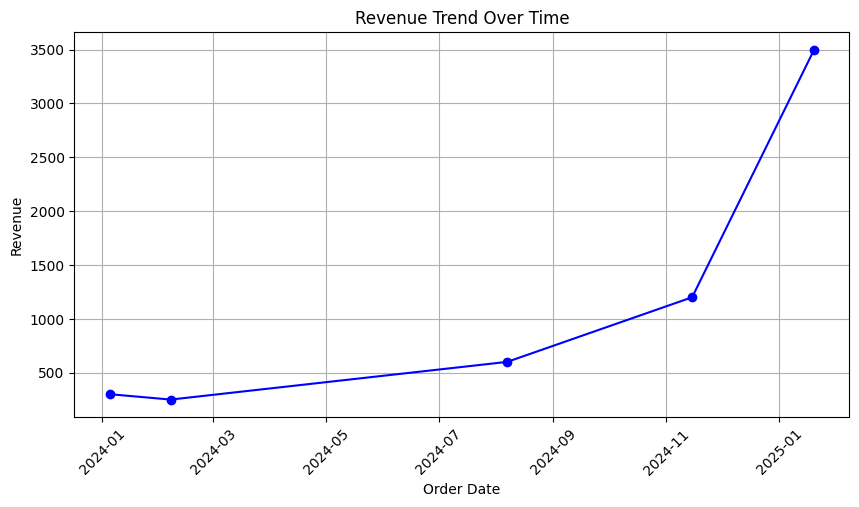

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

order_data = {
    'order_date': ['2024-01-05', '2024-02-07', '2024-08-07', '2024-11-15', '2025-01-20'],
    'revenue': [300, 250, 600, 1200, 3500]
}

df = pd.DataFrame(order_data)
df['order_date'] = pd.to_datetime(df['order_date'])

plt.figure(figsize=(10,5))
plt.plot(df['order_date'], df['revenue'], marker='o', linestyle='-', color='b')
plt.xlabel("Order Date")
plt.ylabel("Revenue")
plt.title("Revenue Trend Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()


<ipython-input-22-85a576a1537a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='total_revenue', data=df_category, palette='viridis')


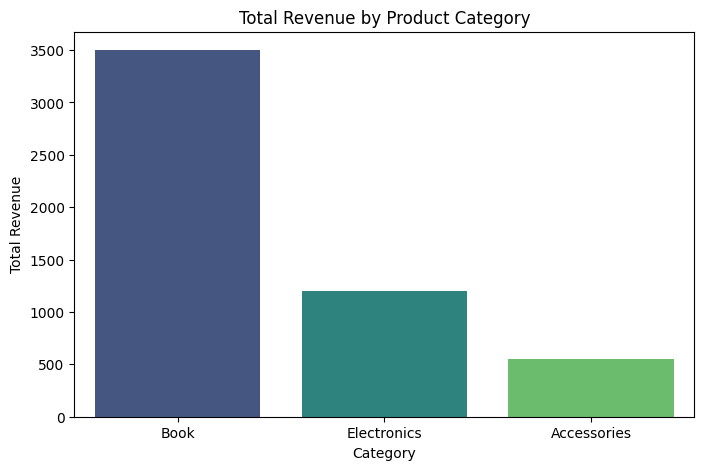

In [ ]:
import seaborn as sns


category_sales = {'category': ['Book', 'Electronics', 'Accessories'], 'total_revenue': [3500, 1200, 550]}

df_category = pd.DataFrame(category_sales)

plt.figure(figsize=(8,5))
sns.barplot(x='category', y='total_revenue', data=df_category, palette='viridis')
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Product Category")
plt.show()


<ipython-input-23-90208028459a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer', y='total_spent', data=df_customers, palette='coolwarm')


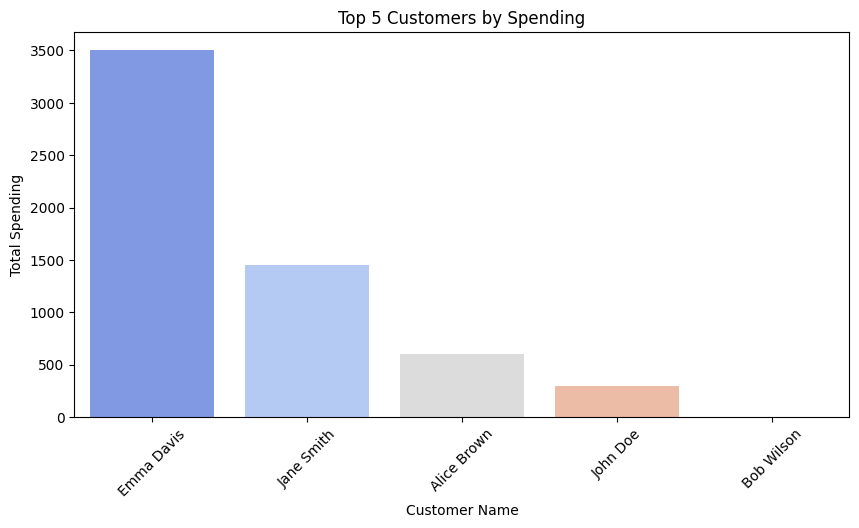

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
customer_spending = {'customer': ['Emma Davis', 'Jane Smith', 'Alice Brown', 'John Doe', 'Bob Wilson'],
                     'total_spent': [3500, 1450, 600, 300, 0]}

df_customers = pd.DataFrame(customer_spending)

plt.figure(figsize=(10,5))
sns.barplot(x='customer', y='total_spent', data=df_customers, palette='coolwarm')
plt.xlabel("Customer Name")
plt.ylabel("Total Spending")
plt.title("Top 5 Customers by Spending")
plt.xticks(rotation=45)
plt.show()
